In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score


# Loading the dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) 

In [3]:
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [5]:
print("Data shape:", X.shape)
print("Target values:", set(y))

Data shape: (569, 30)
Target values: {0, 1}


 # LETS SPLIT THE DATA

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 455
Test size: 114


# NEXT STEP IS TO TRAIN A MODEL

In [11]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

# Confusion Matrics 

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [14]:
y_pred= model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)

print('Confusion Matrix =',cm)
print('accuracy_score =',acc)

Confusion Matrix = [[40  3]
 [ 1 70]]
accuracy_score = 0.9649122807017544


# The model achieved an accuracy of 96.5% with only 3 false positives and 1 false negative. This shows that the model makes very few mistakes, making it highly reliable for classification.

# ROC AND AUC 

# get probability for class 0 (risky)


AUC: 0.9952505732066819


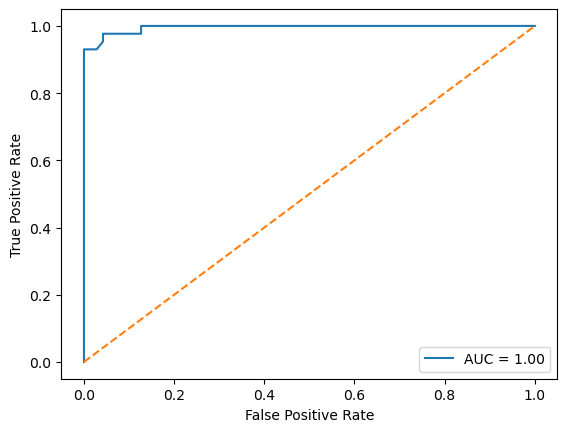

In [17]:
y_proba = model.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=0)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# The ROC curve produced an AUC of 0.99, which indicates excellent separation between positive and negative classes. The model is almost perfect at distinguishing between the two outcomes.

# Top 3 important Features 

In [19]:
importances = model.feature_importances_
top_idx = np.argsort(importances)[::-1][:3]

print("Top 3 important features:")
for i in top_idx:
    print(X.columns[i], ":", importances[i])

Top 3 important features:
worst area : 0.15389236463205394
worst concave points : 0.14466326620735528
mean concave points : 0.10620998844591638


# The feature importance analysis highlights worst area, worst concave points, and mean concave points as the most influential predictors. These features carry significant weight in classification, providing valuable insight into the underlying risk factors.